# Explanation - Shap

In [11]:
import shap
import tensorflow as tf
from keras.models import load_model

from data.file import model_convolutional
from data.load import load_train_data, load_test_data
from model.convolutional import reshape_input
from reporting.evaluation import plot_shap
from reporting.images import display_dataframe
from pandas import concat, DataFrame
from numpy import argmax

In [12]:
print("SHAP version is      :", shap.__version__)
print("Tensorflow version is:", tf.__version__)

tf.compat.v1.disable_eager_execution()

SHAP version is      : 0.40.0
Tensorflow version is: 2.6.2


## Load Test Data

In [13]:
x_test, y_test = load_test_data()
x_test_reshaped, y_test_reshaped = reshape_input(x_test, y_test)

## Load Pretrained Model
The model was pretrained [here](../modeling/01_train_model.ipynb) and persisted into [data](../../data/model/convolutional).

In [14]:
model = load_model(model_convolutional)

## Wrong Predictions
The following code predicts n items out of the test dataset.

In [15]:
compare_items = 100
prediction = [argmax(x) for x in model.predict(x_test_reshaped[:compare_items])]
expectation = y_test_reshaped[:compare_items]

comparison = concat([expectation.rename('actual'), DataFrame(prediction, columns=['prediction'])], axis=1)
missmatch_ids = comparison[comparison.prediction != comparison.actual].index


`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


The following items have bad predictions.

Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


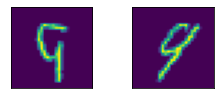

In [16]:
display_dataframe(x_test.iloc[missmatch_ids])

In [17]:
comparison[comparison.prediction != comparison.actual]

,actual,prediction
62,9,5
92,9,4


Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


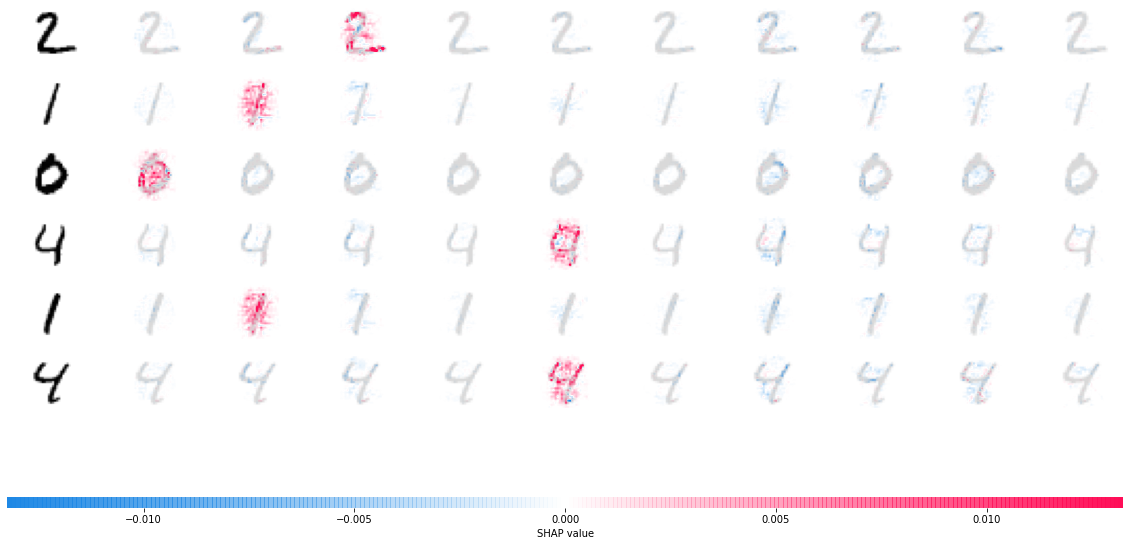

In [18]:
plot_shap(model, x_test_reshaped, elements=7, population=100)

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


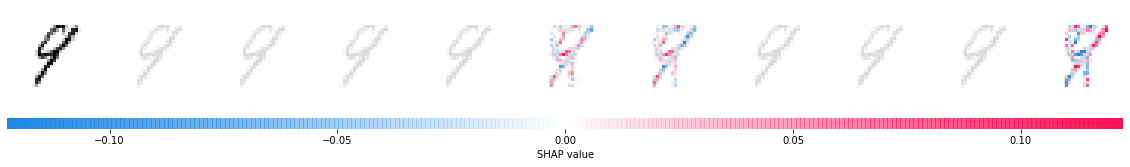

In [19]:
mm = x_test_reshaped[comparison[comparison.prediction != comparison.actual].index]
plot_shap(model, mm, elements=7, population=2)